Authors: José Raúl Romero (jrromero@uco.es), Aurora Ramírez (aurora.ramirez@uma.es), Francisco Javier Alcaide (f52almef@uco.es)

**Notebook for tag prediction model problem using LionForest**

- This notebook contain the installation and usage of LionForest are documented in the notebook "Modelset_Multilabel_LionForest.ipynb"

# Installation:

In [ ]:
# Restart runtime after this cell
!pip uninstall matplotlib
!pip install matplotlib==3.6.0

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.5 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-probability==0.23.0

In [ ]:
!pip install -r /content/drive/MyDrive/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
  Created wheel for anchor-exp: filename=anchor_exp-0.0.2.0-p

In [ ]:
!pip install numpy

In [ ]:
!pip install scikit-learn

In [ ]:
!git clone https://github.com/intelligence-csd-auth-gr/LionLearn.git

Cloning into 'LionLearn'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 821 (delta 119), reused 95 (delta 46), pack-reused 623
Receiving objects: 100% (821/821), 21.06 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (411/411), done.
Updating files: 100% (280/280), done.
Filtering content: 100% (11/11), 776.16 MiB | 34.91 MiB/s, done.


In [ ]:
%cd LionLearn/LionForests_Multi/

/content/LionLearn/LionForests_Multi


In [ ]:
import lionforestsmulti

In [ ]:
from lionforestsmulti import LionForests

In [ ]:
%ls

algorithms/  docker/       lionforestsmulti.py  README.md         utilities/
datasets/    experiments/  __pycache__/         requirements.txt


In [ ]:
from datasets.dataset import Dataset
from sklearn.metrics import f1_score, precision_score
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time
import warnings
import pandas as pd
from utilities.dummy_utilizer import DummyUtilizer
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from scipy import sparse
import numpy as np
import random
np.seterr(invalid='ignore')
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

# TESTING LIONLEARN DATASETS:

This is a quick test of LionForest using the information and code provided in their repository: https://github.com/intelligence-csd-auth-gr/LionLearn/tree/master/LionForests_Multi

In [ ]:
%cd datasets

/content/LionLearn/LionForests_Multi/datasets


In [ ]:
flags = Dataset()
X, y, feature_names, label_names = flags.load_flags()

In [ ]:
lf = LionForests(None, False, None, feature_names, label_names)

In [ ]:
parameters = [{
    'max_depth': [10],
    'max_features': ['sqrt'],
    'bootstrap': [False],
    'min_samples_leaf': [5],
    'n_estimators': [500]
}]
lf.fit(X, y, parameters, True)

In [ ]:
num_labels = [1,2,3,4,5,6,7]

In [ ]:
lf.model

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=5,
                       n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
lf.explain(X[2],n=num_labels)[0]  # OTRA FORMA para 'per label'

'if 3.5<=landmass<=4.5 & 1.0<=zone<=1.5 & 1832.0<=area<=2582.5 & 19.0<=population<=21.0 & 7.5<=language<=8.5 & 1.5<=religion<=2.5 & 1.5<=bars<=2.5 & 0.0<=stripes<=0.5 & 2.5<=colours<=3.5 & 0.0<=circles<=0.5 & 0.0<=crosses<=0.5 & 0.0<=saltires<=0.5 & 0.0<=quarters<=0.5 & 0.5<=sunstars<=1.5 & 0.5<=crescent<=1.0 & 0.0<=triangle<=0.5 & 0.0<=icon<=0.5 & 0.0<=animate<=0.5 & 0.0<=text<=0.5 then red'

In [ ]:
lf.explain_n_wise(X[2],'all',True, method='1')[0]

'if 3.5<=landmass<=4.5 & 1.0<=zone<=1.5 & 1832.0<=area<=2582.5 & 19.0<=population<=21.0 & 7.5<=language<=8.5 & 1.5<=religion<=2.5 & 1.5<=bars<=2.5 & 0.0<=stripes<=0.5 & 2.5<=colours<=3.5 & 0.0<=circles<=0.5 & 0.0<=crosses<=0.5 & 0.0<=saltires<=0.5 & 0.0<=quarters<=0.5 & 0.5<=sunstars<=1.5 & 0.5<=crescent<=1.0 & 0.0<=triangle<=0.5 & 0.0<=icon<=0.5 & 0.0<=animate<=0.5 & 0.0<=text<=0.5 then red green white'

In [ ]:
lf.explain_n_wise(X[2],'per label',True, method='1')['red'][0]

'if 3.5<=landmass<=4.5 & 1.0<=zone<=1.5 & 1832.0<=area<=2582.5 & 19.0<=population<=21.0 & 7.5<=language<=8.5 & 1.5<=religion<=2.5 & 1.5<=bars<=2.5 & 0.0<=stripes<=0.5 & 2.5<=colours<=3.5 & 0.0<=circles<=0.5 & 0.0<=crosses<=0.5 & 0.0<=saltires<=0.5 & 0.0<=quarters<=0.5 & 0.5<=sunstars<=1.5 & 0.5<=crescent<=1.0 & 0.0<=triangle<=0.5 & 0.0<=icon<=0.5 & 0.0<=animate<=0.5 & 0.0<=text<=0.5 then red'

In [ ]:
lf.explain_n_wise(X[2],'frequent pairs',7, True, method='1')[('red', 'green', 'white')][0]

'if 3.5<=landmass<=4.5 & 1.0<=zone<=1.5 & 1832.0<=area<=2582.5 & 19.0<=population<=21.0 & 7.5<=language<=8.5 & 1.5<=religion<=2.5 & 1.5<=bars<=2.5 & 0.0<=stripes<=0.5 & 2.5<=colours<=3.5 & 0.0<=circles<=0.5 & 0.0<=crosses<=0.5 & 0.0<=saltires<=0.5 & 0.0<=quarters<=0.5 & 0.5<=sunstars<=1.5 & 0.5<=crescent<=1.0 & 0.0<=triangle<=0.5 & 0.0<=icon<=0.5 & 0.0<=animate<=0.5 & 0.0<=text<=0.5 then red green white'

In [ ]:
def measure(X_train, X_test, y_train, y_test, feature_names, label_names, tech=False, random_state=10):
    parameters = [{
        'max_depth': [10],
        'max_features': ['sqrt'],
        'bootstrap': [False],
        'min_samples_leaf': [5],
        'n_estimators': [500]
    }]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    lf = LionForests(None, False, scaler, feature_names, label_names)
    lf.fit(X_train, y_train, params=parameters)

    train = lf.utilizer.transform(X_train)
    test = lf.utilizer.transform(X_test)

    predictions = lf.model.predict(train)
    test_predictions = lf.model.predict(test)

    def techniques(model, train, y_train, predictions, test, feature_names, label_names, lf, task, random_state=10):

        # LionForests
        def lf_rule_all(instance):
            temp = lf.explain_n_wise(instance, 'all')[5]
            rule = {}
            for key, value in temp.items():
                rule[key] = [['<=', value[1]], ['>', value[0]]]
            return rule

        def lf_rule_per_label(instance):
            temp = lf.explain_n_wise(instance, 'per label')
            rules = {}
            for key_o in list(temp.keys()):
                rule = {}
                for key, value in temp[key_o][5].items():
                    rule[key] = [['<=', value[1]], ['>', value[0]]]
                rules[key_o] = rule
            return rules

        def lf_rule_pairs(instance):
            temp = lf.explain_n_wise(
                instance, 'frequent pairs', len(label_names))
            rules = {}
            for key_o in list(temp.keys()):
                rule = {}
                for key, value in temp[key_o][5].items():
                    rule[key] = [['<=', value[1]], ['>', value[0]]]
                rules[key_o] = rule
            return rules

        return {'lf-a': lf_rule_all, 'lf-l': lf_rule_per_label, 'lf-p': lf_rule_pairs}

    interpretation = techniques(lf.model, train, y_train, predictions,
                                test, feature_names, label_names, lf, 'classification', random_state)
    if tech:
        return interpretation, lf

    def rule_cov(instance, feature_names, rule):
        covered = True
        for k in range(len(instance)):
            feature = feature_names[k]
            if feature in rule.keys():
                if len(rule[feature]) == 2:
                    if instance[k] > rule[feature][0][1]:  # <=
                        return 0
                    if instance[k] <= rule[feature][1][1]:  # THIS <=
                        return 0
                elif rule[feature][0][0] == '>':
                    if instance[k] <= rule[feature][0][1]:
                        return 0
                else:
                    if instance[k] > rule[feature][0][1]:  # <=
                        return 0
        return 1

    def rule_cov_LF(instance, feature_names, rule):
        covered = True
        for k in range(len(instance)):
            feature = feature_names[k]
            if feature in rule.keys():
                if len(rule[feature]) == 2:
                    if instance[k] > rule[feature][0][1]:  # <=
                        return 0
                    if instance[k] < rule[feature][1][1]:  # THIS <=
                        return 0
                elif rule[feature][0][0] == '>':
                    if instance[k] <= rule[feature][0][1]:
                        return 0
                else:
                    if instance[k] > rule[feature][0][1]:  # <=
                        return 0
        return 1

    rule_generator = interpretation
    full_coverage = {'lf-a': 0, 'lf-l': 0, 'lf-p': 0}
    rule_length = {'lf-a': 0, 'lf-l': 0, 'lf-p': 0}
    f_precision = {'lf-a': [], 'lf-l': [], 'lf-p': []}
    time_response = {'lf-a': [], 'lf-l': [], 'lf-p': []}
    rules = {'lf-a': [], 'lf-l': [], 'lf-p': []}

    x_train_temp = train
    x_test_temp = test

    y_train_temp = predictions
    y_test_temp = test_predictions

    x_train_temp_lf = lf.utilizer.inverse_transform(x_train_temp)
    x_test_temp_lf = lf.utilizer.inverse_transform(x_test_temp)

    for tesd_ind in range(len(test)):
        for name, method in rule_generator.items():
            if name == 'lf-a':
                ts = time.time()
                rule = method(x_test_temp_lf[tesd_ind])
                te = time.time() - ts
                coverage = 0
                precision = []
                co = 0
                for i in x_test_temp_lf:
                    res = rule_cov_LF(i, feature_names, rule)
                    coverage = coverage + res
                    if res == 1:
                        precision.append(
                            [list(y_test_temp[tesd_ind]), list(y_test_temp[co])])
                    co = co + 1
                if len(precision) >= 1:
                    precision = np.array(precision)
                    f_precision[name].append(precision_score(
                        precision[:, 0], precision[:, 1], average='micro'))
                full_coverage[name] = full_coverage[name] + \
                    coverage/len(x_test_temp_lf)
                rules[name].append(rule)
                len_rule = len(rule)
            elif name == 'lf-l':
                ts = time.time()
                rule = method(x_test_temp_lf[tesd_ind])
                te = time.time() - ts
                total_coverage = 0
                total_precision = []
                len_rule = 0
                for key in rule.keys():
                    temp_rule = rule[key]
                    len_rule += len(temp_rule)
                    label_index = list(label_names).index(key)
                    coverage = 0
                    precision = []
                    co = 0
                    for i in x_test_temp_lf:
                        res = rule_cov_LF(i, feature_names, temp_rule)
                        coverage = coverage + res
                        if res == 1:
                            precision.append(
                                [y_test_temp[tesd_ind][label_index], y_test_temp[co][label_index]])
                        co = co + 1
                    if len(precision) >= 1:
                        precision = np.array(precision)
                        total_precision.append(precision_score(
                            precision[:, :1], precision[:, 1:], average='micro'))
                    total_coverage += coverage/len(x_test_temp_lf)
                total_precision = [k for k in total_precision if str(
                    k) != str(np.average([]))]
                f_precision[name].append(np.array(total_precision).mean())
                full_coverage[name] = full_coverage[name] + \
                    total_coverage/len(rule.keys())
                rules[name].append(rule)
            elif name == 'lf-p':
                ts = time.time()
                rule = method(x_test_temp_lf[tesd_ind])
                te = time.time() - ts
                total_coverage = 0
                total_precision = []
                len_rule = 0
                for key in rule.keys():
                    temp_rule = rule[key]
                    len_rule += len(temp_rule)
                    labeles = []
                    for kk in key:
                        labeles.append(list(label_names).index(kk))
                    coverage = 0
                    precision = []
                    co = 0
                    for i in x_test_temp_lf:
                        res = rule_cov_LF(i, feature_names, temp_rule)
                        coverage = coverage + res
                        if res == 1:
                            temp_prediction = [y_test_temp[tesd_ind][j] for j in range(
                                len(y_test_temp[tesd_ind])) if j in labeles]
                            temperatura = [y_test_temp[co][j] for j in range(
                                len(y_test_temp[co])) if j in labeles]
                            precision.append([temp_prediction, temperatura])
                        co = co + 1
                    if len(precision) >= 1:
                        precision = np.array(precision)
                        total_precision.append(precision_score(
                            precision[:, 0], precision[:, 1], average='micro'))
                    total_coverage += coverage/len(x_test_temp_lf)
                total_precision = [k for k in total_precision if str(
                    k) != str(np.average([]))]
                f_precision[name].append(np.array(total_precision).mean())
                full_coverage[name] = full_coverage[name] + \
                    total_coverage/len(rule.keys())
                rules[name].append(rule)

            time_response[name].append(te)
            rule_length[name] = rule_length[name] + len_rule
    return rule_generator, full_coverage, rule_length, f_precision, time_response

In [ ]:
total_results = []
kf = KFold(n_splits=10)
folds = 0
test_size = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_size.append(len(X_test))
    print('# of Fold: ' + str(folds+1) + ', size of test: ' + str(len(X_test)))
    results = measure(X_train, X_test, y_train, y_test,
                      feature_names, label_names)
    total_results.append(results)
    folds = folds+1

# of Fold: 1, size of test: 20
# of Fold: 2, size of test: 20
# of Fold: 3, size of test: 20
# of Fold: 4, size of test: 20
# of Fold: 5, size of test: 19
# of Fold: 6, size of test: 19
# of Fold: 7, size of test: 19
# of Fold: 8, size of test: 19
# of Fold: 9, size of test: 19
# of Fold: 10, size of test: 19


In [ ]:
full_coverage = {'lf-a': [], 'lf-l': [], 'lf-p': []}
rule_length = {'lf-a': [], 'lf-l': [], 'lf-p': []}
f_precision = {'lf-a': [], 'lf-l': [], 'lf-p': []}
f_time = {'lf-a': [], 'lf-l': [], 'lf-p': []}
k = 0
for i in total_results:
    for name, method in i[0].items():
        full_coverage[name].append(i[1][name]/test_size[k])
        rule_length[name].append(i[2][name]/test_size[k])
        l = [k for k in i[3][name] if str(k) != str(np.average([]))]
        f_precision[name].append(np.array(l).mean())
        f_time[name].append(np.array(i[4][name]).mean())
    k = + 1
for name, method in total_results[0][0].items():
    print(name,  '| %5.4f  %5.3f | %5.4f %5.3f | %5.4f  %5.3f | %5.4f  %5.3f'
          % (np.array(full_coverage[name]).mean(), np.array(full_coverage[name]).std(),
             np.array(rule_length[name]).mean(), np.array(
                 rule_length[name]).std(),
             np.array(f_precision[name]).mean(), np.array(
                 f_precision[name]).std(),
             np.array(f_time[name]).mean(), np.array(f_time[name]).std()))

lf-a | 0.0479  0.002 | 18.2350 0.487 | 1.0000  0.000 | 0.5534  0.070
lf-l | 0.0478  0.002 | 62.5750 5.235 | 1.0000  0.000 | 3.4239  0.260
lf-p | 0.0478  0.002 | 111.7000 7.294 | 1.0000  0.000 | 4.4604  0.295


# DATASET ECORE:

In [ ]:
modelset_df_final_ecore = pd.read_csv("/content/drive/MyDrive/modelset_df_final_ecore_filt.csv", index_col=0)

In [ ]:
modelset_df_final_ecore

,references,classes,attributes,packages,enum,datatypes,behaviour,expressions,imperative,uml,statemachine,class,workflow,component,interaction,Classes
11,146,96,39,1,0,0,0,1,0,0,1,0,0,0,0,0
13,1,197,1,1,0,0,0,0,0,1,1,1,1,1,1,0
19,94,77,16,1,1,0,0,1,1,0,0,0,0,0,0,0
22,3,18,0,1,0,0,0,0,0,1,1,1,1,1,1,0
33,168,120,61,23,5,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,64,58,11,1,1,0,0,1,1,0,0,0,0,0,0,0
3775,26,35,8,1,4,0,1,1,0,0,0,0,0,0,0,0
3797,75,59,15,1,0,0,0,1,1,0,0,0,0,0,0,0
3801,19,29,3,1,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# get feature and label names
col_names_ecore = modelset_df_final_ecore.columns
feature_names_ecore = list(col_names_ecore[:6])
label_names_ecore = col_names_ecore[6:16]

In [ ]:
feature_names_ecore

['references', 'classes', 'attributes', 'packages', 'enum', 'datatypes']

In [ ]:
label_names_ecore

Index(['behaviour', 'expressions', 'imperative', 'uml', 'statemachine',
       'class', 'workflow', 'component', 'interaction', 'Classes'],
      dtype='object')

In [ ]:
df_train_r_ecore = pd.read_csv("/content/drive/MyDrive/train_ecore_filt.csv", index_col=0)
df_test_r_ecore = pd.read_csv("/content/drive/MyDrive/test_ecore_filt.csv", index_col=0)

In [ ]:
#inst_select_indexes = {}
#inst_select_indexes['Ecore'] = df_test_r_ecore.index
#inst_select_indexes['Ecore']

Int64Index([ 612,  201,   33, 1178, 1533, 2558, 1301, 1226, 1545, 3635,
            ...
            1775, 1777, 1413,   13, 3500,  202, 2067, 1095,  154,  594],
           dtype='int64', length=115)

In [ ]:
df_train_r_ecore

,references,classes,attributes,packages,enum,datatypes,behaviour,expressions,imperative,uml,statemachine,class,workflow,component,interaction,Classes,.labelcount,.SCUMBLE
2650,17,15,11,1,0,0,1,0,0,0,1,0,0,0,0,0,2,0.062112
897,4,198,1,1,1,0,0,0,0,1,1,1,1,1,1,0,6,0.003161
1208,2,34,0,1,0,0,0,0,0,1,1,1,1,1,1,0,6,0.003161
1103,33,36,16,1,0,0,0,0,0,0,0,1,0,0,0,1,2,0.305762
1894,172,122,61,25,5,0,0,0,0,1,0,1,1,0,0,0,3,0.001043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,1,197,1,1,1,0,0,0,0,1,1,1,1,1,1,0,6,0.003161
3025,1,198,2,1,1,0,0,0,0,1,1,1,1,1,1,0,6,0.003161
483,3,36,0,1,0,0,0,0,0,1,1,1,1,1,1,0,6,0.003161
1187,17,22,4,1,0,3,0,1,1,0,0,0,0,0,0,0,2,0.004053


In [ ]:
df_test_r_ecore

,references,classes,attributes,packages,enum,datatypes,behaviour,expressions,imperative,uml,statemachine,class,workflow,component,interaction,Classes,.labelcount,.SCUMBLE
612,114,94,29,22,3,0,0,0,0,0,0,1,1,0,0,0,2,0.000661
201,90,78,14,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0.011090
33,168,120,61,23,5,0,0,0,0,1,0,1,1,0,0,0,3,0.000583
1178,28,13,18,1,0,0,1,0,0,0,1,0,0,0,0,0,2,0.068877
1533,4,198,1,1,1,0,0,0,0,1,1,1,1,1,1,0,6,0.003878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,75,59,15,1,0,0,0,1,1,0,0,0,0,0,0,0,2,0.006854
2067,1,227,0,1,0,0,0,0,0,1,1,1,1,1,1,0,6,0.003878
1095,22,12,2,1,0,0,0,0,0,0,0,1,0,0,0,1,2,0.375782
154,44,46,11,8,3,4,0,1,1,0,0,0,0,0,0,0,2,0.006854


In [ ]:
df_train_ecore = modelset_df_final_ecore.loc[df_train_r_ecore.index]
df_test_ecore = modelset_df_final_ecore.loc[df_test_r_ecore.index]

In [ ]:
df_train_ecore

,references,classes,attributes,packages,enum,datatypes,behaviour,expressions,imperative,uml,statemachine,class,workflow,component,interaction,Classes
2650,17,15,11,1,0,0,1,0,0,0,1,0,0,0,0,0
897,4,198,1,1,1,0,0,0,0,1,1,1,1,1,1,0
1208,2,34,0,1,0,0,0,0,0,1,1,1,1,1,1,0
1103,33,36,16,1,0,0,0,0,0,0,0,1,0,0,0,1
1894,172,122,61,25,5,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,1,197,1,1,1,0,0,0,0,1,1,1,1,1,1,0
3025,1,198,2,1,1,0,0,0,0,1,1,1,1,1,1,0
483,3,36,0,1,0,0,0,0,0,1,1,1,1,1,1,0
1187,17,22,4,1,0,3,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_test_ecore

,references,classes,attributes,packages,enum,datatypes,behaviour,expressions,imperative,uml,statemachine,class,workflow,component,interaction,Classes
612,114,94,29,22,3,0,0,0,0,0,0,1,1,0,0,0
201,90,78,14,1,0,0,0,1,0,0,1,0,0,0,0,0
33,168,120,61,23,5,0,0,0,0,1,0,1,1,0,0,0
1178,28,13,18,1,0,0,1,0,0,0,1,0,0,0,0,0
1533,4,198,1,1,1,0,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,75,59,15,1,0,0,0,1,1,0,0,0,0,0,0,0
2067,1,227,0,1,0,0,0,0,0,1,1,1,1,1,1,0
1095,22,12,2,1,0,0,0,0,0,0,0,1,0,0,0,1
154,44,46,11,8,3,4,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_test_ecore[label_names_ecore].sum()

behaviour       27
expressions     43
imperative      34
uml             53
statemachine    58
class           57
workflow        53
component       46
interaction     47
Classes          7
dtype: int64

In [ ]:
X_train_df = df_train_ecore[feature_names_ecore]
y_train_df = df_train_ecore[label_names_ecore]
X_test_df = df_test_ecore[feature_names_ecore]
y_test_df = df_test_ecore[label_names_ecore]

In [ ]:
X_train = df_train_ecore[feature_names_ecore].values
y_train = df_train_ecore[label_names_ecore].values
X_test = df_test_ecore[feature_names_ecore].values
y_test = df_test_ecore[label_names_ecore].values

## LF MODEL:

In [ ]:
lf_ecore = LionForests(None, False, None, feature_names_ecore, label_names_ecore) # LF object

In [ ]:
#lf_ecore.fit(X_train, y_train, None, True) # Use this line to fit the model to the data and obtain the best hyperparameters

In [ ]:
parameters = [{
    'max_depth': [10],
    'max_features': [0.75],
    'bootstrap': [True],
    'min_samples_leaf': [1],
    'n_estimators': [100]
}]
lf_ecore.fit(X_train, y_train, parameters, True)

In [ ]:
lf_ecore.model #gridsearch

RandomForestClassifier(max_depth=10, max_features=0.75, n_jobs=-1,
                       random_state=0)

In [ ]:
lf_ecore.accuracy

0.9381082968303396

## GLOBAL EXPLAINABILITY:

In [ ]:
lf_ecore.model.feature_importances_

array([0.43433861, 0.2339351 , 0.22119633, 0.04056914, 0.03183307,
       0.03812776])

In [ ]:
lf_ecore.ranked_features

{'behaviour': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'expressions': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'imperative': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'uml': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'statemachine': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'class': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'workflow': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'component': array(['references', 'classes', 'attributes', 'packages', 'datatypes',
        'enum'], dtype=object),
 'interaction': array(['references', 'classes', 'attributes', 'packag

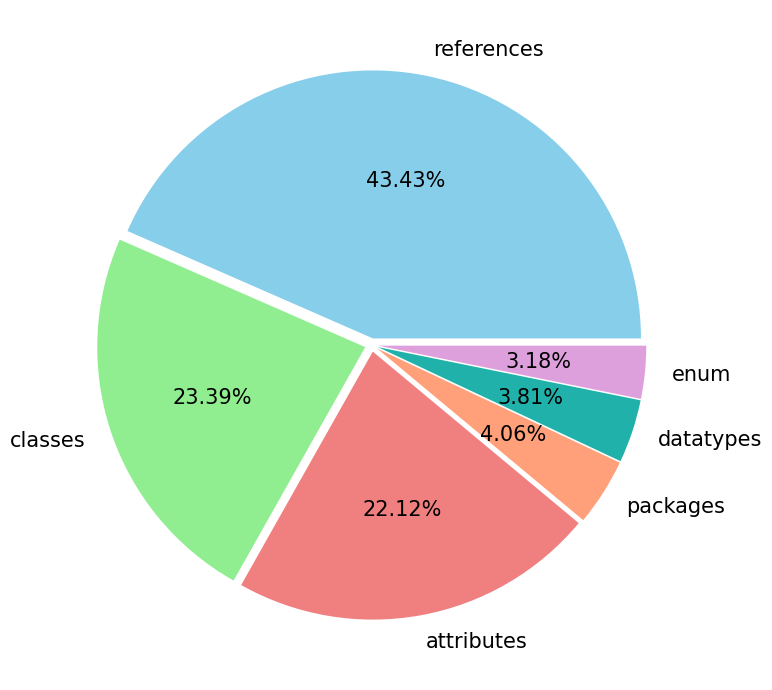

In [ ]:
data = {
    'Feature': ['references', 'classes', 'attributes', 'packages', 'datatypes', 'enum'],
    'Importance': [0.434339, 0.233935, 0.221196, 0.040569, 0.038128, 0.031833]
}

plt.figure(figsize=(8, 7))
plt.pie(data['Importance'], labels=data['Feature'], autopct='%1.2f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'plum'], textprops={'fontsize': 15}, explode=(0.025,0.025,0.025,0.025,0.025,0.025))

plt.tight_layout()
plt.savefig('ecore_multilabel_pie.pdf')
plt.show()

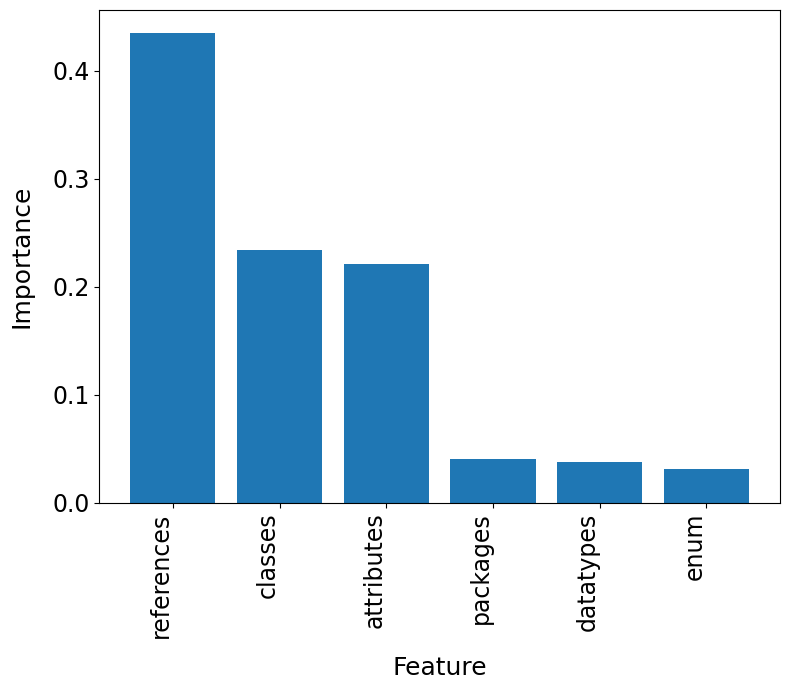

In [ ]:
data = {
    'Feature': ['references', 'classes', 'attributes', 'packages', 'datatypes', 'enum'],
    'Importance': [0.434339, 0.233935, 0.221196, 0.040569, 0.038128, 0.031833]
}

plt.figure(figsize=(8, 7))
plt.bar(data['Feature'], data['Importance'])
plt.xlabel('Feature', fontsize=18, labelpad=13)
plt.ylabel('Importance', fontsize=18, labelpad=13)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('ecore_multilabel_bar.pdf')
plt.show()

## MODEL PERFORMANCE:

In [ ]:
ovr_ecore_rf = OneVsRestClassifier(RandomForestClassifier(max_depth = 10, max_features= 0.75, bootstrap = True, min_samples_leaf = 1, n_estimators = 100, random_state=0))
model_over_ecore_rf = ovr_ecore_rf.fit(X_train_df, y_train_df)
y_pred_ecore_rf = ovr_ecore_rf.predict(X_test_df)

In [ ]:
print(classification_report(y_test_df, y_pred_ecore_rf, target_names=label_names_ecore, digits=4))

              precision    recall  f1-score   support

   behaviour     0.7857    0.8148    0.8000        27
 expressions     0.9512    0.9070    0.9286        43
  imperative     1.0000    0.7941    0.8852        34
         uml     0.9811    0.9811    0.9811        53
statemachine     1.0000    0.9483    0.9735        58
       class     1.0000    0.9825    0.9912        57
    workflow     1.0000    1.0000    1.0000        53
   component     1.0000    1.0000    1.0000        46
 interaction     1.0000    0.9787    0.9892        47
     Classes     0.6667    0.5714    0.6154         7

   micro avg     0.9732    0.9412    0.9569       425
   macro avg     0.9385    0.8978    0.9164       425
weighted avg     0.9736    0.9412    0.9562       425
 samples avg     0.9232    0.9014    0.9084       425



## TEST DATASET RULES:

In [ ]:
rules_ecore_results = {'method_AR': {}, 'method_CR': {}}

for i in df_test_ecore.index:
    for method in ['1', '2']:
        result = lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[i].values, 'all', True, method=method)[0]
        if method == '1':
          rules_ecore_results['method_AR'][f"rule_inst_{i}"] = result
        else:
           rules_ecore_results['method_CR'][f"rule_inst_{i}"] = result

In [ ]:
with open('ecore_multilabel_rules.pickle', 'wb') as f:
    pickle.dump(rules_ecore_results, f)

In [ ]:
lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[33].values,'all',True, method='1')[0]

'if 162.5<=references<=175.5 & 103.5<=classes<=130.5 & 59.5<=attributes<=71.0 & 21.5<=packages<=25.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[33].values,'all',True, method='2')[0]

'if 157.5<=references<=313.0 & 102.0<=classes<=131.5 & 57.0<=attributes<=77.5 & 21.5<=packages<=25.0 & 4.0<=enum<=6.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[33],'all',True, method='1')[0]

'if 157.5<=references<=175.5 & 83.5<=classes<=141.5 & 59.5<=attributes<=86.0 & 14.5<=packages<=25.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[33].values,'all',True, method='1')[0]

'if 157.5<=references<=175.5 & 83.5<=classes<=141.5 & 59.5<=attributes<=86.0 & 14.5<=packages<=25.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(X_test[1],'all',True, method='1')[0]

'if 89.5<=references<=92.0 & 65.0<=classes<=78.5 & 10.5<=attributes<=14.5 & 1.0<=packages<=1.5 & 0.0<=enum<=0.5 & 0.0<=datatypes<=0.5 then expressions imperative'

In [ ]:
lf_ecore.explain_n_wise(X_test[1],'all',True, method='2')[0]

'if 89.5<=references<=92.0 & 65.0<=classes<=78.5 & 10.5<=attributes<=14.5 & 1.0<=packages<=1.5 & 0.0<=enum<=0.5 & 0.0<=datatypes<=0.5 then expressions imperative'

In [ ]:
lf_ecore.explain_n_wise(X_test[2],'all',True, method='1')[0]

'if 157.5<=references<=175.5 & 83.5<=classes<=141.5 & 59.5<=attributes<=86.0 & 14.5<=packages<=25.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(X_test[2],'all',True, method='2')[0]

'if 157.5<=references<=175.5 & 83.5<=classes<=141.5 & 59.5<=attributes<=86.0 & 14.5<=packages<=25.0 & 0.5<=enum<=16.0 & 0.0<=datatypes<=0.5 then uml class workflow'

In [ ]:
lf_ecore.explain_n_wise(df_test_ecore[feature_names_ecore].loc[612],'per label',True, method='1')['class'][0]

'if 102.5<=references<=125.5 & 57.5<=classes<=94.0 & 14.5<=attributes<=35.5 & 21.5<=packages<=25.0 & 0.0<=datatypes<=0.5 then class'

## "PER_LABEL" APPROACH:

In [ ]:
def rule_cov_LF(instance, feature_names, rule):
    for k in range(len(instance)):
        feature = feature_names[k]
        if feature in rule.keys():
            if len(rule[feature]) == 2:
                if instance[k] > rule[feature][0][1]:  # <=
                    return 0
                if instance[k] < rule[feature][1][1]:  # THIS <=
                    return 0
            elif rule[feature][0][0] == '>':
                if instance[k] <= rule[feature][0][1]:
                    return 0
            else:
                if instance[k] > rule[feature][0][1]:  # <=
                    return 0
    return 1

In [ ]:
# Function to get rules per_laber for all dataset
def measure_global_ecore(X_train, X_test, y_train, y_test, feature_names, label_names, random_state=42):
    parameters = [{
        'max_depth': [10],
        'max_features': [0.75],
        'bootstrap': [True],
        'min_samples_leaf': [1],
        'n_estimators': [100]
    }]
    lf = LionForests(None, False, None, feature_names, label_names)
    lf.fit(X_train, y_train, params=parameters)

    rules_per_instance = []

    for instance in X_test:
        temp = lf.explain_n_wise(instance, 'per label')
        rules = {}
        for key_o in list(temp.keys()):
            rule = {}
            for key, value in temp[key_o][5].items():
                rule[key] = [['<=', value[1]], ['>', value[0]]]
            rules[key_o] = rule
        rules_per_instance.append(rules)

    full_coverage = []
    rule_length = []
    f_precision = []
    time_response = []

    for tesd_ind in range(len(X_test)):
        instance = X_test[tesd_ind]
        rules = rules_per_instance[tesd_ind]
        coverage = 0
        len_rule = 0
        precisions = []
        ts = time.time()
        for key, rule in rules.items():
            precision = []
            for i, true_label in enumerate(y_test):
                res = rule_cov_LF(X_test[i], feature_names, rule)
                coverage += res
                if res == 1:
                    precision.append([list(y_test[i]), list(y_test[i])])
            if len(precision) >= 1:
                precision = np.array(precision)
                precisions.append(precision_score(
                    precision[:, 0], precision[:, 1], average='micro'))
            len_rule += len(rule)
        te = time.time() - ts
        time_response.append(te)
        full_coverage.append(coverage / len(X_test))
        rule_length.append(len_rule)
        f_precision.append(np.mean(precisions))

    return rules_per_instance, full_coverage, rule_length, f_precision, time_response


In [ ]:
rules_inst, full_coverage, rule_length, f_precision, time_response = measure_global_ecore(X_train, X_test, y_train, y_test, feature_names_ecore, label_names_ecore)

In [ ]:
# Function to get rules per_label for each tag
def measure_class_ecore(X_train, X_test, y_train, y_test, feature_names, label_names, random_state=42):
    parameters = [{
        'max_depth': [10],
        'max_features': [0.75],
        'bootstrap': [True],
        'min_samples_leaf': [1],
        'n_estimators': [100]
    }]
    lf = LionForests(None, False, None, feature_names, label_names)
    lf.fit(X_train, y_train, params=parameters)

    label_names_list = list(label_names)

    class_metrics = {label: {'coverage': [], 'rule_length': [], 'f_precision': [], 'time_response': []} for label in label_names}

    for tesd_ind in range(len(X_test)):
        instance = X_test[tesd_ind]
        temp = lf.explain_n_wise(instance, 'per label')
        rules = {}

        for key_o in list(temp.keys()):
            rule = {}
            for key, value in temp[key_o][5].items():
                rule[key] = [['<=', value[1]], ['>', value[0]]]
            rules[key_o] = rule

        keys_list = rules.keys()
        y_pred = [1 if element in keys_list else 0 for element in label_names_list]
        precisions = []

        for key, rule in rules.items():
            precision = []
            coverage = 0
            len_rule = 0
            index_label = label_names_list.index(key)
            ts = time.time()

            for i , true_label in enumerate(y_test):
                res = rule_cov_LF(X_test[i], feature_names, rule)
                coverage += res
                if res == 1:
                    precision.append([y_test[i][index_label], y_pred[index_label]])

            if len(precision) >= 1:
                precision = np.array(precision)
                precisions.append([precision[0][0], precision[0][1]])
            else:
              print(f'Rule from index {tesd_ind} does not cover any instance')
              continue

            prec = np.array(precisions)
            precisions_calc = precision_score(prec[:, 0], prec[:, 1], average='micro')
            len_rule += len(rule)
            te = time.time() - ts
            class_metrics[key]['coverage'].append(coverage / len(X_test))
            class_metrics[key]['rule_length'].append(len_rule)
            class_metrics[key]['f_precision'].append(np.nanmean(precisions_calc))
            class_metrics[key]['time_response'].append(te)

    return class_metrics


In [ ]:
class_metrics = measure_class_ecore(X_train, X_test, y_train, y_test, feature_names_ecore, label_names_ecore)

In [ ]:
df_means_stds_ecore = pd.DataFrame(index=label_names_ecore, columns=['coverage_mean', 'coverage_std', 'rule_length_mean', 'rule_length_std', 'f_precision_mean', 'f_precision_std', 'time_response_mean', 'time_response_std'])

for label, metrics in class_metrics.items():
    coverage_mean = np.nanmean(metrics['coverage'])
    coverage_std = np.nanstd(metrics['coverage'])
    rule_length_mean = np.nanmean(metrics['rule_length'])
    rule_length_std = np.nanstd(metrics['rule_length'])
    f_precision_mean = np.nanmean(metrics['f_precision'])
    f_precision_std = np.nanstd(metrics['f_precision'])
    time_response_mean = np.nanmean(metrics['time_response'])
    time_response_std = np.nanstd(metrics['time_response'])

    df_means_stds_ecore.loc[label] = [coverage_mean, coverage_std, rule_length_mean, rule_length_std, f_precision_mean, f_precision_std, time_response_mean, time_response_std]

df_means_stds_ecore

,coverage_mean,coverage_std,rule_length_mean,rule_length_std,f_precision_mean,f_precision_std,time_response_mean,time_response_std
behaviour,0.013859,0.006826,5.53125,0.749349,0.75,0.433013,0.002234,0.003217
expressions,0.011931,0.005312,5.813953,0.58093,0.883721,0.281962,0.001731,0.000773
imperative,0.012062,0.005707,5.967742,0.176685,0.935484,0.210297,0.001397,0.000454
uml,0.13612,0.08062,2.384615,1.076923,1.0,0.0,0.001755,0.000474
statemachine,0.131079,0.083134,2.518519,1.258169,0.990741,0.067408,0.00145,0.000509
class,0.127019,0.084318,2.607143,1.31853,1.0,0.0,0.001584,0.000996
workflow,0.133388,0.082181,2.415094,1.071658,1.0,0.0,0.002107,0.002939
component,0.151985,0.071838,2.0,0.0,1.0,0.0,0.001356,0.000516
interaction,0.151985,0.071838,2.0,0.0,1.0,0.0,0.002029,0.002998
Classes,0.008696,0.0,6.0,0.0,1.0,0.0,0.001593,0.000566


In [ ]:
for label in list(label_names_ecore):
  print(f'---- {label} ----')
  print(len(class_metrics[label]['f_precision']))
  print(len(class_metrics[label]['coverage']))
  print(len(class_metrics[label]['rule_length']))

---- behaviour ----
32
32
32
---- expressions ----
43
43
43
---- imperative ----
31
31
31
---- uml ----
52
52
52
---- statemachine ----
54
54
54
---- class ----
56
56
56
---- workflow ----
53
53
53
---- component ----
46
46
46
---- interaction ----
46
46
46
---- Classes ----
3
3
3


In [ ]:
# Results complete dataset
mean_full_coverage = np.nanmean(full_coverage)
std_full_coverage = np.nanstd(full_coverage)

mean_rule_length = np.nanmean(rule_length)
std_rule_length = np.nanstd(rule_length)

mean_f_precision = np.nanmean(f_precision)
std_f_precision = np.nanstd(f_precision)

mean_time_response = np.nanmean(time_response)
std_time_response = np.nanstd(time_response)

print("Mean full_coverage:", mean_full_coverage)
print("Standard deviation full_coverage:", std_full_coverage)

print("Mean rule_length:", mean_rule_length)
print("Standard deviation rule_length:", std_rule_length)

print("Mean f_precision:", mean_f_precision)
print("Standard deviation f_precision:", std_f_precision)

print("Mean time_response:", mean_time_response)
print("Standard deviation time_response:", std_time_response)

Mean full_coverage: 0.37981096408317583
Standard deviation full_coverage: 0.5129807373460431
Mean rule_length: 11.721739130434782
Standard deviation rule_length: 2.2748065415573886
Mean f_precision: 1.0
Standard deviation f_precision: 0.0
Mean time_response: 0.00574688082155974
Standard deviation time_response: 0.0033700791915929253


# DATASET UML:

In [ ]:
modelset_df_final_uml = pd.read_csv("/content/drive/MyDrive/modelset_df_final_uml_filt.csv", index_col=0)

In [ ]:
modelset_df_final_uml

,type_Class,type_Relationship,type_Package,type_Actor,type_DataType,type_Operation,type_Transition,type_State,type_Property,type_UseCase,...,registration,appointment,events,checkouts,course-management,donation,services,online-teaching,students,admission
21,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
123,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0
155,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0
167,0,24,1,3,0,0,0,0,34,14,...,0,0,0,0,0,0,0,0,1,0
257,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
278,7,13,1,0,0,13,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
401,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
515,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get feature and label names
col_names_uml = modelset_df_final_uml.columns
feature_names_uml = list(col_names_uml[:13])
label_names_uml = col_names_uml[13:30]

In [ ]:
feature_names_uml

['type_Class',
 'type_Relationship',
 'type_Package',
 'type_Actor',
 'type_DataType',
 'type_Operation',
 'type_Transition',
 'type_State',
 'type_Property',
 'type_UseCase',
 'type_Component',
 'type_Enumeration',
 'type_Activity']

In [ ]:
label_names_uml

Index(['teaching', 'health', 'api', 'student-management', 'login', 'internet',
       'simulation', 'registration', 'appointment', 'events', 'checkouts',
       'course-management', 'donation', 'services', 'online-teaching',
       'students', 'admission'],
      dtype='object')

In [ ]:
df_train_uml = pd.read_csv("/content/drive/MyDrive/train_uml_filt.csv", index_col=0)
df_test_uml = pd.read_csv("/content/drive/MyDrive/test_uml_filt.csv", index_col=0)

In [ ]:
#inst_select_indexes['UML'] = df_train_uml.index
#inst_select_indexes['UML']

Int64Index([1593,  458, 1116, 1514, 1589, 1168, 1886, 1492, 1258, 1441,  573,
            1714, 1445, 1298,  155, 1911, 1587, 1121, 1691,  123, 1677, 1617,
             526, 1449, 1460, 1206,  823,  455,  278,  167],
           dtype='int64')

In [ ]:
df_train_uml

,type_Class,type_Relationship,type_Package,type_Actor,type_DataType,type_Operation,type_Transition,type_State,type_Property,type_UseCase,...,registration,appointment,events,checkouts,course-management,donation,services,online-teaching,students,admission
1593,10,10,1,1,2,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
458,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1116,7,13,1,0,0,13,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0
1589,0,24,1,3,0,0,0,0,34,14,...,0,0,0,0,0,0,0,0,0,1
1168,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1886,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1492,0,17,1,2,0,0,0,0,32,10,...,0,0,0,0,0,0,0,0,0,0
1258,7,13,1,0,0,13,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_uml

,type_Class,type_Relationship,type_Package,type_Actor,type_DataType,type_Operation,type_Transition,type_State,type_Property,type_UseCase,...,registration,appointment,events,checkouts,course-management,donation,services,online-teaching,students,admission
257,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1751,10,10,1,1,2,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1774,0,24,1,3,0,0,0,0,34,14,...,0,0,0,0,0,0,0,0,1,1
1930,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
803,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0
801,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,10,10,1,1,2,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1761,0,15,1,6,0,0,0,0,24,13,...,0,0,0,0,0,0,0,0,0,0
851,0,24,1,4,0,0,0,0,30,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train_uml[feature_names_uml].values
y_train = df_train_uml[label_names_uml].values
X_test = df_test_uml[feature_names_uml].values
y_test = df_test_uml[label_names_uml].values

In [ ]:
X_train_df = df_train_uml[feature_names_uml]
y_train_df = df_train_uml[label_names_uml]
X_test_df = df_test_uml[feature_names_uml]
y_test_df = df_test_uml[label_names_uml]

## LF MODEL:

In [ ]:
lf_uml = LionForests(None, False, None, feature_names_uml, label_names_uml)

In [ ]:
#lf_uml.fit(X_train, y_train, None, True)

In [ ]:
parameters = [{
    'max_depth': [7],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'min_samples_leaf': [1],
    'n_estimators': [500]
}]
lf_uml.fit(X_train, y_train, parameters, True)

In [ ]:
lf_uml.model

RandomForestClassifier(max_depth=7, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
lf_uml.accuracy

0.6811188811188811

## GLOBAL EXPLAINABILITY:

In [ ]:
lf_uml.model.feature_importances_

array([0.0923255 , 0.18677395, 0.        , 0.09564719, 0.0328926 ,
       0.05686547, 0.        , 0.        , 0.20609575, 0.11335972,
       0.02152407, 0.        , 0.19451575])

In [ ]:
lf_uml.ranked_features

{'teaching': array(['type_Property', 'type_Activity', 'type_Relationship',
        'type_UseCase', 'type_Actor', 'type_Class', 'type_Operation',
        'type_DataType', 'type_Component', 'type_Package',
        'type_Transition', 'type_State', 'type_Enumeration'], dtype=object),
 'health': array(['type_Property', 'type_Activity', 'type_Relationship',
        'type_UseCase', 'type_Actor', 'type_Class', 'type_Operation',
        'type_DataType', 'type_Component', 'type_Package',
        'type_Transition', 'type_State', 'type_Enumeration'], dtype=object),
 'api': array(['type_Property', 'type_Activity', 'type_Relationship',
        'type_UseCase', 'type_Actor', 'type_Class', 'type_Operation',
        'type_DataType', 'type_Component', 'type_Package',
        'type_Transition', 'type_State', 'type_Enumeration'], dtype=object),
 'student-management': array(['type_Property', 'type_Activity', 'type_Relationship',
        'type_UseCase', 'type_Actor', 'type_Class', 'type_Operation',
        '

In [ ]:
data_uml = {
    'Feature': ['type_Property', 'type_Activity', 'type_Relationship', 'type_UseCase', 'type_Actor', 'type_Class', 'type_Operation', 'type_DataType', 'type_Component'],
    'Importance': [0.206096, 0.194516, 0.186774, 0.113360, 0.095647, 0.092325, 0.056865, 0.032893, 0.021524]
}

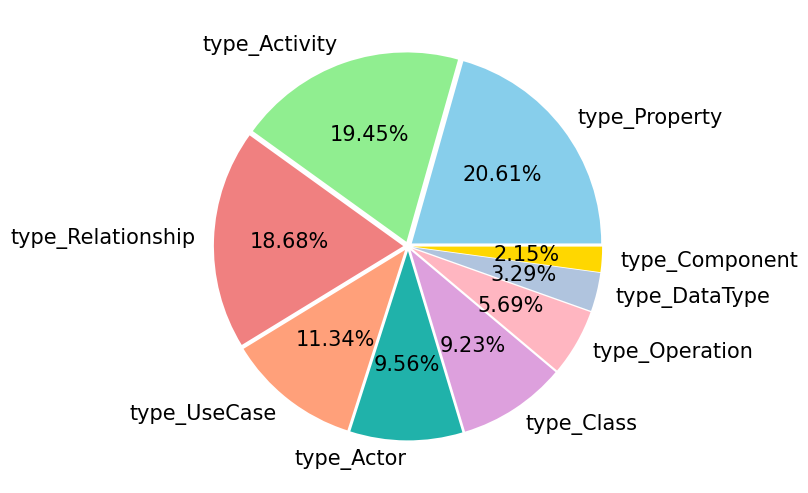

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data_uml['Importance'], labels=data_uml['Feature'], autopct='%1.2f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'plum', 'lightpink', 'lightsteelblue', 'gold'], textprops={'fontsize': 15}, explode=(0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025))
plt.tight_layout()
plt.savefig('uml_multilabel_pie.pdf')
plt.show()

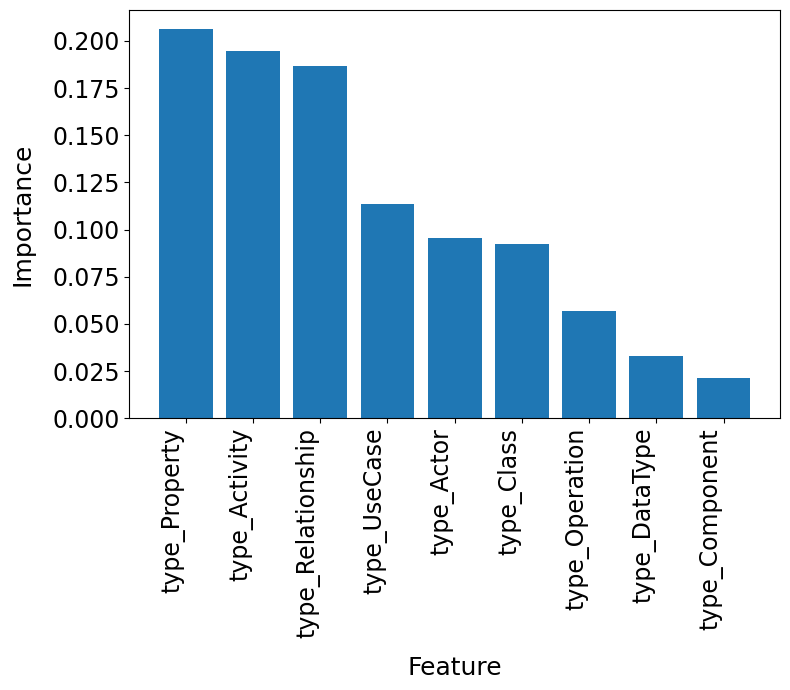

In [ ]:
plt.figure(figsize=(8, 7))
plt.bar(data_uml['Feature'], data_uml['Importance'])
plt.xlabel('Feature', fontsize=18, labelpad=13)
plt.ylabel('Importance', fontsize=18, labelpad=13)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('uml_multilabel_bar.pdf')
plt.show()

## MODEL PERFORMANCE:

In [ ]:
ovr_uml_rf = OneVsRestClassifier(RandomForestClassifier(max_depth = 7 , max_features= 'sqrt', bootstrap = True, min_samples_leaf = 1, n_estimators = 500, random_state=0))
model_over_uml_rf = ovr_uml_rf.fit(X_train_df, y_train_df)
y_pred_uml_rf = ovr_uml_rf.predict(X_test_df)

In [ ]:
print(classification_report(y_test_df, y_pred_uml_rf, target_names=label_names_uml, digits=4))

                    precision    recall  f1-score   support

          teaching     0.9167    0.8462    0.8800        13
            health     1.0000    0.3333    0.5000         3
               api     1.0000    1.0000    1.0000         2
student-management     1.0000    0.8750    0.9333         8
             login     0.5000    0.5000    0.5000         2
          internet     0.3333    1.0000    0.5000         2
        simulation     0.3333    1.0000    0.5000         2
      registration     0.0000    0.0000    0.0000         1
       appointment     0.0000    0.0000    0.0000         2
            events     0.0000    0.0000    0.0000         1
         checkouts     1.0000    1.0000    1.0000         2
 course-management     0.0000    0.0000    0.0000         2
          donation     1.0000    1.0000    1.0000         1
          services     0.0000    0.0000    0.0000         1
   online-teaching     0.0000    0.0000    0.0000         1
          students     0.0000    0.0000

## TEST DATASET RULES:

In [ ]:
rules_uml_results = {'method_AR': {}, 'method_CR': {}}

for i in df_test_uml.index:
    for method in ['1', '2']:
        result = lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[i].values, 'all', True, method=method)[0]
        if method == '1':
          rules_uml_results['method_AR'][f"rule_inst_{i}"] = result
        else:
           rules_uml_results['method_CR'][f"rule_inst_{i}"] = result

In [ ]:
with open('uml_multilabel_rules.pickle', 'wb') as f:
    pickle.dump(rules_uml_results, f)

In [ ]:
with open ('/content/LionLearn/LionForests_Multi/uml_multilabel_rules.pickle', 'rb') as f:
  uml_results=pickle.load(f)

In [ ]:
uml_results['method_AR']['rule_inst_257']

'if 0.0<=type_Class<=0.5 & 1.0<=type_Relationship<=5.5 & 0.0<=type_Actor<=0.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then health donation'

In [ ]:
lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[1397].values, 'all', True, method='1')[0]

'if 8.5<=type_Class<=10.0 & 5.5<=type_Relationship<=11.5 & 0.5<=type_Actor<=1.5 & 1.0<=type_DataType<=2.0 & 6.5<=type_Operation<=14.0 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then api checkouts'

In [ ]:
lf_uml.explain_n_wise(X_test[0],'all',True, method='1')[0]

'if 0.0<=type_Class<=0.5 & 1.0<=type_Relationship<=5.5 & 0.0<=type_Actor<=0.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then health donation'

In [ ]:
lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[257].values, 'all', True, method='1')[0]

'if 0.0<=type_Class<=0.5 & 1.0<=type_Relationship<=5.5 & 0.0<=type_Actor<=0.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then health donation'

In [ ]:
lf_uml.explain_n_wise(X_test[0],'all',True, method='2')[0]

'if 0.0<=type_Class<=0.5 & 1.0<=type_Relationship<=5.5 & 0.0<=type_Actor<=0.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then health donation'

In [ ]:
lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[257].values, 'all', True, method='2')[0]

'if 0.0<=type_Class<=0.5 & 1.0<=type_Relationship<=5.5 & 0.0<=type_Actor<=0.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 0.0<=type_Property<=12.0 & 0.0<=type_UseCase<=4.5 & 0.0<=type_Component<=0.5 & 1.5<=type_Activity<=2.0 then health donation'

In [ ]:
lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[1774].values, 'all', True, method='1')[0]

'if 0.0<=type_Class<=0.5 & 21.5<=type_Relationship<=26.0 & 2.5<=type_Actor<=3.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 33.0<=type_Property<=35.0 & 13.5<=type_UseCase<=15.0 & 0.0<=type_Component<=0.5 & 0.0<=type_Activity<=0.5 then teaching login'

In [ ]:
lf_uml.explain_n_wise(df_test_uml[feature_names_uml].loc[1774].values, 'all', True, method='2')[0]

'if 0.0<=type_Class<=0.5 & 21.5<=type_Relationship<=26.0 & 2.5<=type_Actor<=3.5 & 0.0<=type_DataType<=1.0 & 0.0<=type_Operation<=6.5 & 33.0<=type_Property<=35.0 & 13.5<=type_UseCase<=15.0 & 0.0<=type_Component<=0.5 & 0.0<=type_Activity<=0.5 then teaching login'

## PER_LABEL APPROACH:

In [ ]:
def rule_cov_LF(instance, feature_names, rule):
    for k in range(len(instance)):
        feature = feature_names[k]
        if feature in rule.keys():
            if len(rule[feature]) == 2:
                if instance[k] > rule[feature][0][1]:  # <=
                    return 0
                if instance[k] < rule[feature][1][1]:  # THIS <=
                    return 0
            elif rule[feature][0][0] == '>':
                if instance[k] <= rule[feature][0][1]:
                    return 0
            else:
                if instance[k] > rule[feature][0][1]:  # <=
                    return 0
    return 1

In [ ]:
# Function to get rules per_laber for all dataset
def measure_global_uml(X_train, X_test, y_train, y_test, feature_names, label_names, random_state=42):
    parameters = [{
        'max_depth': [7],
        'max_features': ['sqrt'],
        'bootstrap': [True],
        'min_samples_leaf': [1],
        'n_estimators': [500]
    }]
    lf = LionForests(None, False, None, feature_names, label_names)
    lf.fit(X_train, y_train, params=parameters)

    rules_per_instance = []

    for instance in X_test:
        temp = lf.explain_n_wise(instance, 'per label')
        rules = {}
        for key_o in list(temp.keys()):
            rule = {}
            for key, value in temp[key_o][5].items():
                rule[key] = [['<=', value[1]], ['>', value[0]]]
            rules[key_o] = rule
        rules_per_instance.append(rules)

    full_coverage = []
    rule_length = []
    f_precision = []
    time_response = []

    for tesd_ind in range(len(X_test)):
        instance = X_test[tesd_ind]
        rules = rules_per_instance[tesd_ind]
        coverage = 0
        len_rule = 0
        precisions = []
        ts = time.time()
        for key, rule in rules.items():
            precision = []
            for i, true_label in enumerate(y_test):
                res = rule_cov_LF(X_test[i], feature_names, rule)
                coverage += res
                if res == 1:
                    precision.append([list(y_test[i]), list(y_test[i])])
            if len(precision) >= 1:
                precision = np.array(precision)
                precisions.append(precision_score(
                    precision[:, 0], precision[:, 1], average='micro'))
            len_rule += len(rule)
        te = time.time() - ts
        time_response.append(te)
        full_coverage.append(coverage / len(X_test))
        rule_length.append(len_rule)
        f_precision.append(np.mean(precisions))

    return rules_per_instance, full_coverage, rule_length, f_precision, time_response


In [ ]:
rules_inst, full_coverage, rule_length, f_precision, time_response = measure_global_uml(X_train, X_test, y_train, y_test, feature_names_ecore, label_names_ecore)

In [ ]:
def measure_class_uml(X_train, X_test, y_train, y_test, feature_names, label_names, random_state=42):
    parameters = [{
        'max_depth': [7],
        'max_features': ['sqrt'],
        'bootstrap': [True],
        'min_samples_leaf': [1],
        'n_estimators': [500]
    }]

    lf = LionForests(None, False, None, feature_names, label_names)
    lf.fit(X_train, y_train, params=parameters)

    label_names_list = list(label_names)

    class_metrics = {label: {'coverage': [], 'rule_length': [], 'f_precision': [], 'time_response': []} for label in label_names}

    for tesd_ind in range(len(X_test)):
        instance = X_test[tesd_ind]
        temp = lf.explain_n_wise(instance, 'per label')
        rules = {}

        for key_o in list(temp.keys()):
            rule = {}
            for key, value in temp[key_o][5].items():
                rule[key] = [['<=', value[1]], ['>', value[0]]]
            rules[key_o] = rule

        keys_list = rules.keys()
        y_pred = [1 if element in keys_list else 0 for element in label_names_list]
        precisions = []

        for key, rule in rules.items():
            precision = []
            coverage = 0
            len_rule = 0
            index_label = label_names_list.index(key)
            ts = time.time()

            for i , true_label in enumerate(y_test):
                res = rule_cov_LF(X_test[i], feature_names, rule)
                coverage += res
                if res == 1:
                    precision.append([y_test[i][index_label], y_pred[index_label]])

            if len(precision) >= 1:
                precision = np.array(precision)
                precisions.append([precision[0][0], precision[0][1]])
            else:
              print(f'Rule from index {tesd_ind} does not cover any instance')
              continue

            prec = np.array(precisions)
            precisions_calc = precision_score(prec[:, 0], prec[:, 1], average='micro')
            len_rule += len(rule)
            te = time.time() - ts
            class_metrics[key]['coverage'].append(coverage / len(X_test))
            class_metrics[key]['rule_length'].append(len_rule)
            class_metrics[key]['f_precision'].append(np.nanmean(precisions_calc))
            class_metrics[key]['time_response'].append(te)

    return class_metrics


In [ ]:
class_metrics = measure_class_uml(X_train, X_test, y_train, y_test, feature_names_uml, label_names_uml)

Rule from index 11 does not cover any instance


In [ ]:
for label in list(label_names_uml):
  print(f'---- {label} ----')
  print(len(class_metrics[label]['f_precision']))
  print(len(class_metrics[label]['coverage']))
  print(len(class_metrics[label]['rule_length']))

---- teaching ----
11
11
11
---- health ----
1
1
1
---- api ----
2
2
2
---- student-management ----
6
6
6
---- login ----
2
2
2
---- internet ----
6
6
6
---- simulation ----
6
6
6
---- registration ----
0
0
0
---- appointment ----
0
0
0
---- events ----
0
0
0
---- checkouts ----
2
2
2
---- course-management ----
0
0
0
---- donation ----
1
1
1
---- services ----
0
0
0
---- online-teaching ----
1
1
1
---- students ----
0
0
0
---- admission ----
0
0
0


In [ ]:
df_means_stds_uml = pd.DataFrame(index=label_names_uml, columns=['coverage_mean', 'coverage_std', 'rule_length_mean', 'rule_length_std', 'f_precision_mean', 'f_precision_std', 'time_response_mean', 'time_response_std'])

for label, metrics in class_metrics.items():
    coverage_mean = np.nanmean(metrics['coverage'])
    coverage_std = np.nanstd(metrics['coverage'])
    rule_length_mean = np.nanmean(metrics['rule_length'])
    rule_length_std = np.nanstd(metrics['rule_length'])
    f_precision_mean = np.nanmean(metrics['f_precision'])
    f_precision_std = np.nanstd(metrics['f_precision'])
    time_response_mean = np.nanmean(metrics['time_response'])
    time_response_std = np.nanstd(metrics['time_response'])

    df_means_stds_uml.loc[label] = [coverage_mean, coverage_std, rule_length_mean, rule_length_std, f_precision_mean, f_precision_std, time_response_mean, time_response_std]

df_means_stds_uml

,coverage_mean,coverage_std,rule_length_mean,rule_length_std,f_precision_mean,f_precision_std,time_response_mean,time_response_std
teaching,0.099567,0.068721,7.272727,1.354515,0.909091,0.28748,0.001902,0.000314
health,0.047619,0.0,9.0,0.0,1.0,0.0,0.001763,0.0
api,0.095238,0.0,9.0,0.0,1.0,0.0,0.001626,0.000052
student-management,0.142857,0.067344,6.333333,0.471405,1.0,0.0,0.001482,0.000172
login,0.047619,0.0,9.0,0.0,0.75,0.25,0.002465,0.00011
internet,0.285714,0.0,9.0,0.0,0.0,0.0,0.002734,0.001098
simulation,0.285714,0.0,9.0,0.0,0.0,0.0,0.002011,0.000455
registration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appointment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
events,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Results complete dataset
mean_full_coverage = np.nanmean(full_coverage)
std_full_coverage = np.nanstd(full_coverage)

mean_rule_length = np.nanmean(rule_length)
std_rule_length = np.nanstd(rule_length)

mean_f_precision = np.nanmean(f_precision)
std_f_precision = np.nanstd(f_precision)

mean_time_response = np.nanmean(time_response)
std_time_response = np.nanstd(time_response)

print("Mean full_coverage:", mean_full_coverage)
print("Standard deviation full_coverage:", std_full_coverage)

print("Mean rule_length:", mean_rule_length)
print("Standard deviation rule_length:", std_rule_length)

print("Mean f_precision:", mean_f_precision)
print("Standard deviation f_precision:", std_f_precision)

print("Mean time_response:", mean_time_response)
print("Standard deviation time_response:", std_time_response)

# TEST INDICES:

In [ ]:
df_test_r_ecore = pd.read_csv("/content/drive/MyDrive/test_ecore_filt.csv", index_col=0)

df_test_uml = pd.read_csv("/content/drive/MyDrive/test_uml_filt.csv", index_col=0)

In [ ]:
inst_select_indexes = {}
inst_select_indexes['Ecore'] = df_test_r_ecore.index
inst_select_indexes['UML'] = df_train_uml.index

Int64Index([ 612,  201,   33, 1178, 1533, 2558, 1301, 1226, 1545, 3635,
            ...
            1775, 1777, 1413,   13, 3500,  202, 2067, 1095,  154,  594],
           dtype='int64', length=115)

In [ ]:
import pickle
with open('multilabel_indexes.pickle', 'wb') as f:
    pickle.dump(inst_select_indexes, f)

In [ ]:
with open('/content/multilabel_indexes.pickle', 'rb') as f:
    index_dict=pickle.load(f)